### **[LeetCode Link](https://leetcode-cn.com/problems/permutations-ii/solution/hui-su-suan-fa-python-dai-ma-java-dai-ma-by-liwe-2/)**

## 回溯搜索 + 剪枝
### 思路：在一定会产生重复结果集的地方剪枝。
一个比较容易想到的办法是在结果集中去重。但是问题又来了，这些结果集的元素是一个又一个列表，对列表去重不像用哈希表对基本元素去重那样容易。

如果要比较两个列表是否一样，一个很显然的办法是分别排序，然后逐个比对。既然要排序，我们可以**在搜索之前就对候选数组排序**，一旦发现这一支搜索下去可能搜索到重复的元素就停止搜索，这样结果集中不会包含重复元素。
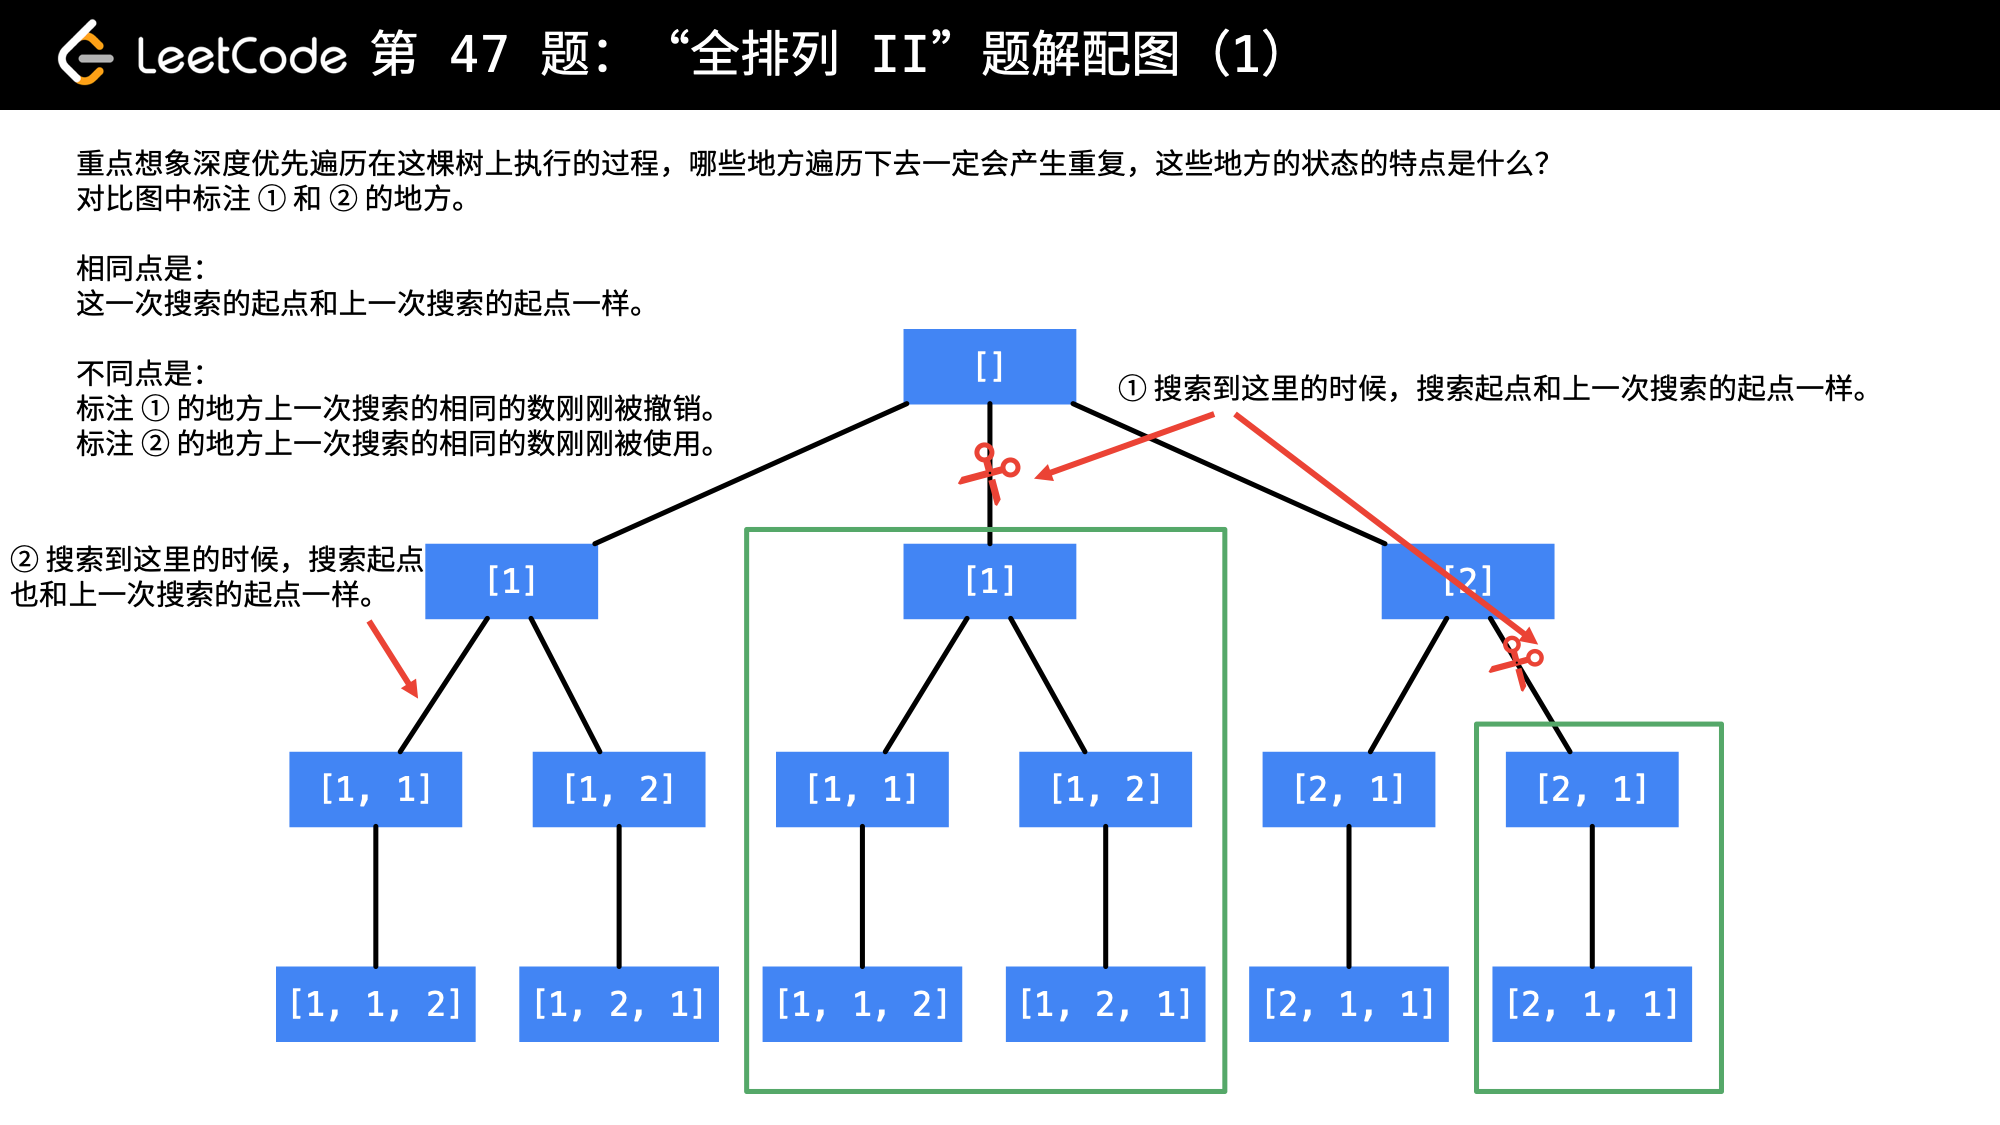

产生重复结点的地方，正是图中标注了“剪刀”，且被绿色框框住的地方。

大家也可以把第 2 个 `1` 加上 `'` ，即 `[1, 1', 2]` 去想象这个搜索的过程。只要遇到起点一样，就有可能产生重复。这里还有一个很细节的地方：
 1. 在图中 ② 处，搜索的数也和上一次一样，但是上一次的 1 还在使用中；
 2. **在图中 ① 处，搜索的数也和上一次一样，但是上一次的 1 刚刚被撤销，正是因为刚被撤销，下面的搜索中还会使用到，因此会产生重复，剪掉的就应该是这样的分支。**

### 复杂度分析：
时间复杂度：$O(N \times N!)$，这里 $N$ 为数组的长度。
空间复杂度：$O(N \times N!)$。

### 补充说明
写 `used[i - 1]` 代码正确，但是不推荐的原因。
* 如果剪枝写的是：
```python
if i > 0 and nums[i] == nums[i - 1] and not used[i - 1]:
    continue
```

那么，对于数组 `[1, 1’, 1’’, 2]`，回溯的过程如下：![title](1.jpg)  
得到的全排列是：`[[1, 1', 1'', 2], [1, 1', 2, 1''], [1, 2, 1', 1''], [2, 1, 1', 1'']]`。特点是：`1、1'、1''` 出现的顺序只能是 `1、1'、1''`。
* 如果剪枝写的是：
```python
if i > 0 and nums[i] == nums[i - 1] and used[i - 1]:
    continue
```

相同的1选出的数的顺序一定是：`1'', 1', 1`

因此，`used[i - 1]` 前面加不加感叹号的区别仅在于保留的是相同元素的顺序索引，还是倒序索引。**很明显，顺序索引（即使用 `!used[i - 1]` 作为剪枝判定条件得到）的递归树剪枝更彻底，思路也相对较自然。**

In [ ]:
Solution:

    def permuteUnique(self, nums: List[int]) -> List[List[int]]:

        def dfs(nums, size, depth, path, used, res):
            if depth == size:
                res.append(path.copy())
                return
            for i in range(size):
                if not used[i]:

                    if i > 0 and nums[i] == nums[i - 1] and not used[i - 1]:
                        continue

                    used[i] = True
                    path.append(nums[i])
                    dfs(nums, size, depth + 1, path, used, res)
                    used[i] = False
                    path.pop()

        size = len(nums)
        if size == 0:
            return []

        nums.sort()

        used = [False] * len(nums)
        res = []
        dfs(nums, size, 0, [], used, res)
        return res